# 컬러 영상 다루기

In [1]:
import numpy as np
import cv2

### 컬러 영상의 픽셀값 참조

In [2]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
src.shape

(356, 493, 3)

In [3]:
b = src[0][0][0]
g = src[0][0][1]
r = src[0][0][2]
print(b, g, r)

47 88 50


In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

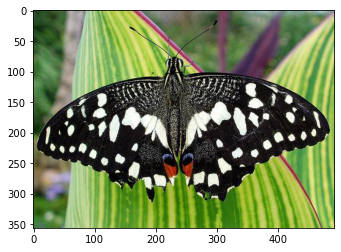

In [5]:
src = mpimg.imread('./data/butterfly.jpg')
plt.imshow(src)

In [6]:
%matplotlib qt
plt.imshow(src)

### 컬러 영상의 픽셀값 반전

In [7]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)

In [8]:
# 1. for문으로 한 픽셀값씩 반전
dst = np.zeros(src.shape, src.dtype)

for j in range(src.shape[0]): # height or rows
    for i in range(src.shape[1]): # width  or columns
        p = src[j, i]
        ip = dst[j, i]
        
        ip[0] = 255 - p[0]
        ip[1] = 255 - p[1]
        ip[2] = 255 - p[2]
        
cv2.imshow('src', src)        
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# 2. 이미지 channel별 반전
dst = np.zeros(src.shape, src.dtype)

dst[:, :, 0] = 255 - src[:, :, 0]
dst[:, :, 1] = 255 - src[:, :, 1]
dst[:, :, 2] = 255 - src[:, :, 2]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# 3. 전체 이미지 반전
dst = np.zeros(src.shape, src.dtype)

dst = 255 - src

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 색공간 변환

In [11]:
# BGR 3채널 컬러 영상을 그레일스케일 영상으로 변환
# Y = 0.299R + 0.578G + 0.114B

In [12]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

cv2.imshow('src', src)
cv2.imshow('gray', gray)

cv2.waitKey()
cv2.destroyAllWindows()

### 색상 채널 나누기

In [13]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

cv2.imshow('src', src)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)

cv2.imshow('gray', gray)
cv2.imshow('y', y)
cv2.imshow('cr', cr)
cv2.imshow('cb', cb)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
y.shape, gray.shape

((356, 493), (356, 493))

In [16]:
(y != gray).sum()

6

In [17]:
src = cv2.imread('./data/candies.png', cv2.IMREAD_COLOR)

b, g, r = cv2.split(src)

cv2.imshow('src', src)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
src = cv2.imread('./data/candies.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)

cv2.imshow('src', src)
cv2.imshow('gray', gray)
cv2.imshow('y', y)
cv2.imshow('cr', cr)
cv2.imshow('cb', cb)

cv2.waitKey()
cv2.destroyAllWindows()

### 컬러 히스토그램 평활화

In [19]:
src = cv2.imread('./data/pepper.bmp', cv2.IMREAD_COLOR)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(src_ycrcb)
y_eq = cv2.equalizeHist(y)

dst_ycrcb = cv2.merge((y_eq, cr, cb))
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst', dst)
cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

### 색상 범위 지정에 의한 영역 분할

In [20]:
# 1. BGR
def onChange(pos):
    global src, dst
    lr = cv2.getTrackbarPos('Lower R', 'src')
    ur = cv2.getTrackbarPos('Upper R', 'src')
    
    lg = cv2.getTrackbarPos('Lower G', 'src')
    ug = cv2.getTrackbarPos('Upper G', 'src')
    
    lb = cv2.getTrackbarPos('Lower B', 'src')
    ub = cv2.getTrackbarPos('Upper B', 'src')
    dst = cv2.inRange(src, (lr, lg, lb), (ur, ug, ub))
    cv2.imshow("dst", dst)
    
src = cv2.imread('./data/hand.jpg')

# lowerb = (90, 100, 150)
# upperb = (120, 150, 190)

# dst = cv2.inRange(src, lowerb, upperb)

cv2.imshow('src', src)

cv2.createTrackbar('Lower R', 'src', 0, 255, onChange)
cv2.createTrackbar('Upper R', 'src', 0, 255, onChange)

cv2.createTrackbar('Lower G', 'src', 0, 255, onChange)
cv2.createTrackbar('Upper G', 'src', 0, 255, onChange)

cv2.createTrackbar('Lower B', 'src', 0, 255, onChange)
cv2.createTrackbar('Upper B', 'src', 0, 255, onChange)

cv2.setTrackbarPos('Lower R', 'src', 90)
cv2.setTrackbarPos('Upper R', 'src', 120)

cv2.setTrackbarPos('Lower G', 'src', 100)
cv2.setTrackbarPos('Upper G', 'src', 150)

cv2.setTrackbarPos('Lower B', 'src', 150)
cv2.setTrackbarPos('Upper B', 'src', 190)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
# 2. HSV
def onChange(pos):
    global hsv
    lh = cv2.getTrackbarPos('Lower H', 'src')
    uh = cv2.getTrackbarPos('Upper H', 'src')
    
    ls = cv2.getTrackbarPos('Lower S', 'src')
    us = cv2.getTrackbarPos('Upper S', 'src')
    
    lv = cv2.getTrackbarPos('Lower V', 'src')
    uv = cv2.getTrackbarPos('Upper V', 'src')
    dst = cv2.inRange(hsv, (lh, ls, lv), (uh, us, uv))
    cv2.imshow("dst", dst)

src=cv2.imread('./data/hand.jpg')
hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)


# lowerb=(0,20,0)
# upperb=(20,160,255)

# dst=cv2.inRange(hsv,lowerb,upperb)

cv2.imshow('src',src)

cv2.createTrackbar('Lower H', 'src', 0, 255, onChange)
cv2.createTrackbar('Upper H', 'src', 0, 255, onChange)

cv2.createTrackbar('Lower S', 'src', 0, 255, onChange)
cv2.createTrackbar('Upper S', 'src', 0, 255, onChange)

cv2.createTrackbar('Lower V', 'src', 0, 255, onChange)
cv2.createTrackbar('Upper V', 'src', 0, 255, onChange)

cv2.setTrackbarPos('Lower H', 'src', 0)
cv2.setTrackbarPos('Upper H', 'src', 20)

cv2.setTrackbarPos('Lower S', 'src', 20)
cv2.setTrackbarPos('Upper S', 'src', 160)

cv2.setTrackbarPos('Lower V', 'src', 0)
cv2.setTrackbarPos('Upper V', 'src', 255)


cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
def onChange(pos):
    global hsv
    lh = cv2.getTrackbarPos('Lower H', 'src')
    uh = cv2.getTrackbarPos('Upper H', 'src')

    dst = cv2.inRange(hsv, (lh, 90, 0), (uh, 255, 255))
    cv2.imshow("dst", dst)

src=cv2.imread('./data/candies.png')
hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

cv2.imshow('src',src)

cv2.createTrackbar('Lower H', 'src', 0, 255, onChange)
cv2.createTrackbar('Upper H', 'src', 0, 255, onChange)

cv2.setTrackbarPos('Lower H', 'src', 35)
cv2.setTrackbarPos('Upper H', 'src', 90)

cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 역투영

In [23]:
%matplotlib inline

In [24]:
src = np.array([[0, 0, 0, 0],
                [1, 1, 3, 5],
                [6, 1, 1, 3],
                [4, 3, 1, 7]], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 8])
backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)

In [25]:
hist

array([[9.],
       [3.],
       [2.],
       [2.]], dtype=float32)

In [26]:
backP

array([[9, 9, 9, 9],
       [9, 9, 3, 2],
       [2, 9, 9, 3],
       [2, 3, 9, 2]], dtype=uint8)

<BarContainer object of 4 artists>

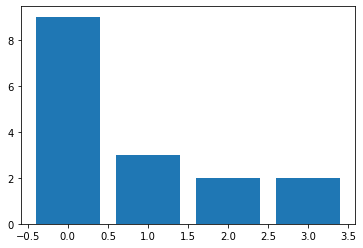

In [27]:
plt.bar(np.arange(4), hist.flatten())

In [28]:
ref = cv2.imread('./data/ref.png', cv2.IMREAD_COLOR)
mask = cv2.imread('./data/mask.bmp', cv2.IMREAD_GRAYSCALE)

ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)
channels = [1, 2] # cr, cb channel
histSize = [128, 128]
ranges = [0, 256] + [0, 256]

hist = cv2.calcHist([ref_ycrcb], channels, mask, histSize, ranges)

src = cv2.imread('./data/kids.png', cv2.IMREAD_COLOR)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backP = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('ref', ref)
cv2.imshow('mask', mask)
cv2.imshow('backP', backP)

cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
hist.shape

(128, 128)

In [30]:
mask = cv2.imread('./data/kids.png')

cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()